## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Base Classes
from sklearn.base import BaseEstimator, TransformerMixin

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, learning_curve 
from sklearn.metrics import precision_recall_curve, roc_curve, make_scorer, fbeta_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.tree import plot_tree

# Data Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer


# Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, validation_curve


##### Save Model Example

In [2]:
# Save Model Using Pickle
import pandas
from sklearn import model_selection
import pickle
# model.fit(X_train, Y_train)
# # save the model to disk
# filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))

# # some time later...

# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))

In the previous section, we realised that the XGBoost, Random Forest and Decision Tree Classifiers were the best models to use on our dataset. Hence we will make use of these types of models in order to predict the target variable.

## Importing Cleaned Dataset

In [3]:
X_train = pd.read_csv('data/X_train.csv')

In [4]:
y_train = pd.read_csv('data/y_train.csv')

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19103 entries, 0 to 19102
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   acceleration_x  19103 non-null  float64
 1   acceleration_y  19103 non-null  float64
 2   acceleration_z  19103 non-null  float64
 3   gyro_x          19103 non-null  float64
 4   gyro_y          19103 non-null  float64
 5   gyro_z          19103 non-null  float64
 6   speed           19103 non-null  float64
 7   duration        19103 non-null  float64
 8   pitch           19103 non-null  float64
 9   roll            19103 non-null  float64
 10  yaw             19103 non-null  float64
dtypes: float64(11)
memory usage: 1.6 MB


In [6]:
X_train

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,speed,duration,pitch,roll,yaw
0,-0.373308,4.053876,7.650463,0.019553,-0.012699,-0.009920,2.652283,1433.0,-2.468859,27.890330,44.965935
1,-0.016709,-9.373962,1.237487,-0.005341,-0.013084,-0.009308,4.477035,684.0,-0.101250,-82.479010,44.997389
2,0.282825,9.654101,-0.818620,-0.000114,-0.003936,-0.000067,12.151972,1449.0,1.672050,84.873541,-43.385687
3,0.420909,9.339060,2.837508,0.000191,0.005097,-0.002347,8.887775,1688.0,2.469249,72.925299,44.688239
4,0.323466,9.418683,1.301069,-0.008071,-0.068260,0.001833,13.185759,1889.0,1.948448,81.898817,44.141056
...,...,...,...,...,...,...,...,...,...,...,...
19098,0.320747,-9.207694,-2.614691,-0.010633,-0.001078,-0.001170,7.346692,1252.0,1.919253,-74.034350,-44.786058
19099,-0.886285,7.216394,6.315394,-0.002215,0.014080,0.011983,17.675436,313.0,-5.280355,48.532287,44.720643
19100,0.092423,9.178709,2.408700,-0.000352,0.006735,0.000442,12.962808,325.0,0.558017,75.285500,44.978926
19101,0.244527,9.792183,0.348584,-0.000056,0.006450,-0.000512,10.784266,1468.0,1.429569,87.510149,39.305789


### Import the test data

In [7]:
X_test = pd.read_csv("data/X_test.csv")
y_test = pd.read_csv("data/y_test.csv")

In [8]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19103 entries, 0 to 19102
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   19103 non-null  int64
dtypes: int64(1)
memory usage: 149.4 KB


## Modelling functions
I have created some functions which will help me in this journey to modelling

In [10]:
def plot_learning_curve(estimator, title, X, y, scoring=None, axes=None, ylim=None,cv = StratifiedKFold(shuffle=True, random_state = 42), n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(figsize=(10, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, scoring=scoring, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,  return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
    axes.legend(loc="best")
    return plt

metrics = {
    "f1" : "f1",
    "accuracy" : "accuracy",
    "recall" : "recall" 
}
def evaluate_candidate_model(clf, X, y, metrics = metrics, cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42), history = pd.DataFrame(), return_estimator = False, return_learning_curve = True):
    scores = cross_validate(clf, X, y, cv = cv, scoring = metrics, return_train_score = True, return_estimator = return_estimator, n_jobs= -1)
    if return_estimator:
        best_estimator = scores["estimator"][np.argmax(scores["test_f1"])]
        del scores["estimator"]
    scores = pd.DataFrame(scores).describe().iloc[1:3, 2:].round(5) # Get Summarized Cross Val Scores
    his_snapshot = scores.iloc[0, :]
    his_snapshot["Model Name"] = title
    his_snapshot["Standard Error of F1 Score"] = scores["test_f1"].iloc[1] / np.sqrt(cv.get_n_splits())
    his_snapshot["Performance Gap"] = his_snapshot["train_f1"] - his_snapshot["test_f1"]
    history = history.append(his_snapshot)
    if return_learning_curve:
      lr = plot_learning_curve(clf, title, X, y, scoring=list(metrics.values())[0], cv = cv)
    return scores, history, lr if return_learning_curve else None, best_estimator if return_estimator else None


### Baseline Model
Before starting our model building, we will construct a stupid baseline to compare all other models against. This stupid baseline will predict a random value based on the distribution of classes in the training data. Since our classes are balanced, we will use stratified strategy.

C:\Users\joshu\AppData\Local\Temp\ipykernel_25152\1507733524.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(his_snapshot)


,test_f1,train_f1,test_accuracy,train_accuracy,test_recall,train_recall
mean,0.49569,0.49202,0.50202,0.49869,0.49734,0.49338
std,0.00705,0.00459,0.00841,0.00520,0.00664,0.00525


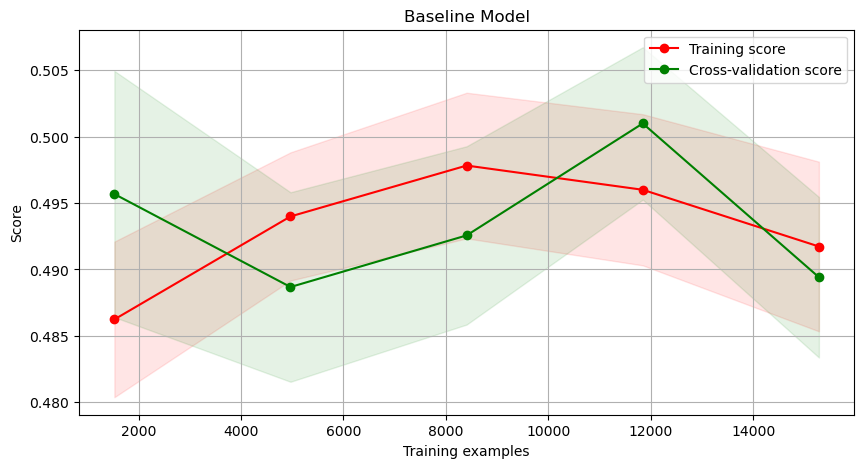

In [11]:

baseline = Pipeline([
    ('Model', DummyClassifier(strategy="stratified"))
])

title = "Baseline Model"


scores, history, base, _ = evaluate_candidate_model(baseline, X_train, y_train)
display(scores)

### Decision Tree Classifier

C:\Users\joshu\AppData\Local\Temp\ipykernel_25152\1507733524.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(his_snapshot)


,test_f1,train_f1,test_accuracy,train_accuracy,test_recall,train_recall
mean,0.80481,1.0,0.79066,1.0,0.87713,1.0
std,0.00753,0.0,0.00803,0.0,0.01222,0.0


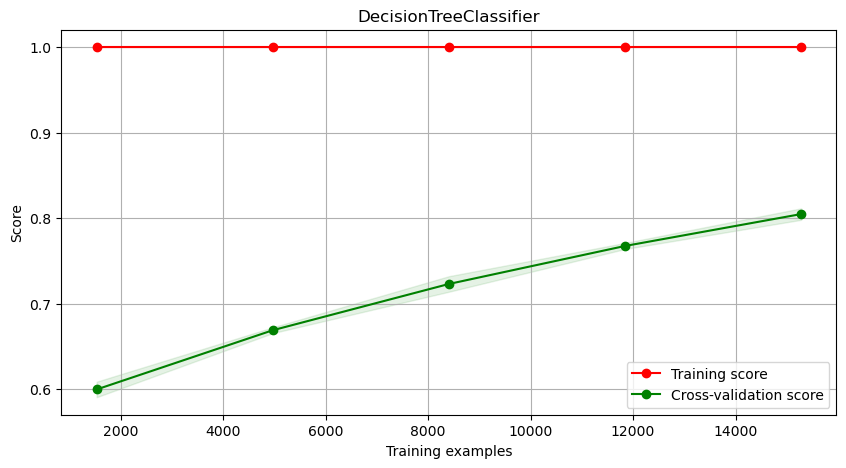

In [12]:
dt = Pipeline([
    ('Model', DecisionTreeClassifier(random_state=42))
])

title = "DecisionTreeClassifier"


scores, history, lr, _ = evaluate_candidate_model(dt, X_train, y_train, history=history)
display(scores)

### Random Forest Classifier

C:\Users\joshu\AppData\Local\Temp\ipykernel_25152\1507733524.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(his_snapshot)


,test_f1,train_f1,test_accuracy,train_accuracy,test_recall,train_recall
mean,0.58609,0.59799,0.64079,0.65113,0.51702,0.52745
std,0.00725,0.00677,0.00132,0.00229,0.01469,0.01191


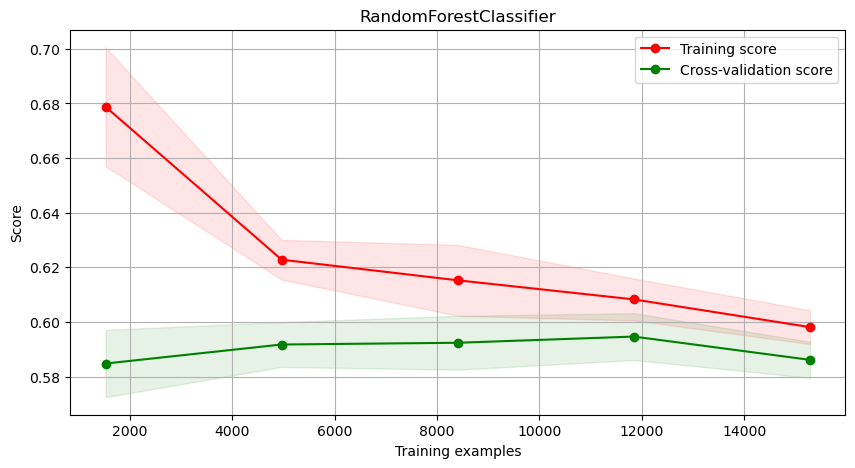

In [13]:
rf = Pipeline([
    ('Model', RandomForestClassifier(random_state=42,n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True))
])

title = "RandomForestClassifier"


scores, history, lr, _ = evaluate_candidate_model(
    rf, X_train, y_train, history=history)
display(scores)


### Guassian Naive Bayes

C:\Users\joshu\AppData\Local\Temp\ipykernel_25152\1507733524.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(his_snapshot)


,test_f1,train_f1,test_accuracy,train_accuracy,test_recall,train_recall
mean,0.65963,0.65963,0.49217,0.49217,1.0,1.0
std,0.00005,0.00001,0.00011,0.00003,0.0,0.0


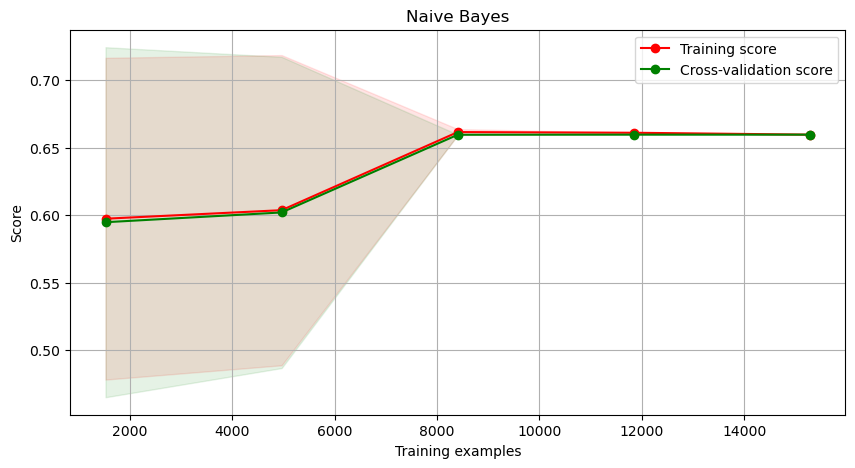

In [14]:
estimator = GaussianNB()
title = "Naive Bayes"

scores, history, lr, _ = evaluate_candidate_model(estimator, X_train, y_train, history=history)
display(scores)

### SVM Classifier

C:\Users\joshu\AppData\Local\Temp\ipykernel_25152\1507733524.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(his_snapshot)


,test_f1,train_f1,test_accuracy,train_accuracy,test_recall,train_recall
mean,0.21242,0.21661,0.52918,0.53109,0.12915,0.13181
std,0.01541,0.00924,0.00362,0.00102,0.01109,0.00718


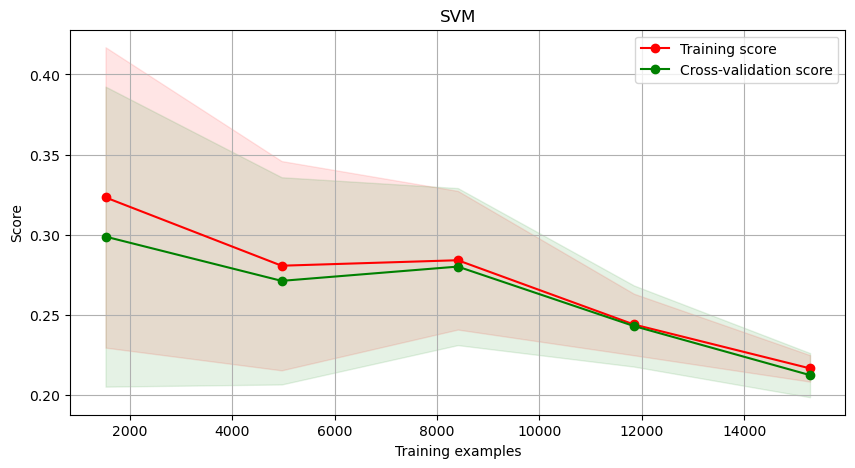

In [15]:
svm = Pipeline([
    ('Model', SVC(random_state=42))
])

title = "SVM"


scores, history, lr, _ = evaluate_candidate_model(svm, X_train, y_train, history=history)
display(scores)

### K-Nearest Neighbors Classifier

C:\Users\joshu\AppData\Local\Temp\ipykernel_25152\1507733524.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(his_snapshot)


,test_f1,train_f1,test_accuracy,train_accuracy,test_recall,train_recall
mean,0.62659,0.76232,0.61399,0.75263,0.65819,0.80620
std,0.00399,0.00048,0.00372,0.00081,0.00574,0.00182


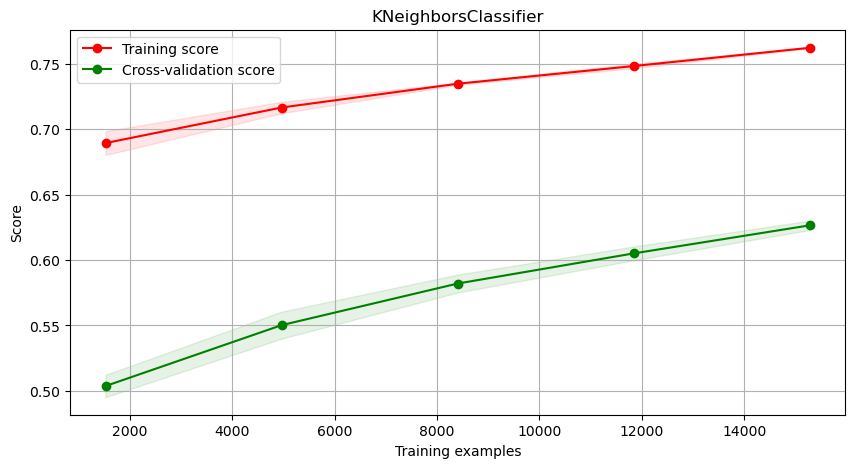

In [16]:
knn = Pipeline([
    ('Model', KNeighborsClassifier())
])

title = "KNeighborsClassifier"


scores, history, lr, _ = evaluate_candidate_model(knn, X_train, y_train, history=history)
display(scores)

### XGBoost Classifier

In [17]:
!pip install xgboost

C:\Users\joshu\AppData\Local\Temp\ipykernel_25152\1507733524.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(his_snapshot)


,test_f1,train_f1,test_accuracy,train_accuracy,test_recall,train_recall
mean,0.74593,0.90022,0.74637,0.90269,0.75681,0.89213
std,0.00802,0.00457,0.00667,0.00436,0.01458,0.00563


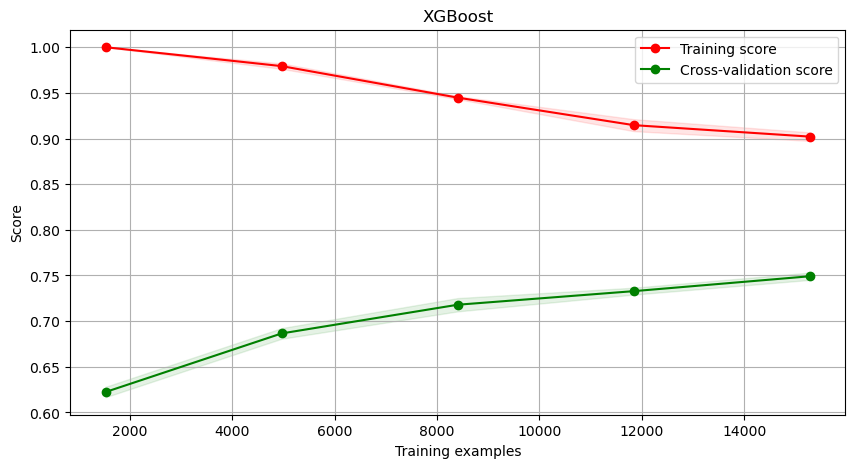

In [18]:
import xgboost as xgb
xgbo = Pipeline([
    ('Model', xgb.XGBClassifier(random_state=42))
])
title = "XGBoost"

scores, history, lr, _ = evaluate_candidate_model(xgbo, X_train, y_train, history=history)
display(scores)

In [19]:
history.set_index("Model Name").sort_values(["test_f1", "Performance Gap"], ascending=[False, True])

,test_f1,train_f1,test_accuracy,train_accuracy,test_recall,train_recall,Standard Error of F1 Score,Performance Gap
Model Name,,,,,,,,
DecisionTreeClassifier,0.80481,1.00000,0.79066,1.00000,0.87713,1.00000,0.003368,0.19519
XGBoost,0.74593,0.90022,0.74637,0.90269,0.75681,0.89213,0.003587,0.15429
Naive Bayes,0.65963,0.65963,0.49217,0.49217,1.00000,1.00000,0.000022,0.00000
KNeighborsClassifier,0.62659,0.76232,0.61399,0.75263,0.65819,0.80620,0.001784,0.13573
RandomForestClassifier,0.58609,0.59799,0.64079,0.65113,0.51702,0.52745,0.003242,0.01190
Baseline Model,0.49569,0.49202,0.50202,0.49869,0.49734,0.49338,0.003153,-0.00367
SVM,0.21242,0.21661,0.52918,0.53109,0.12915,0.13181,0.006892,0.00419


## Hyper Parameter Tuning

### Decision Tree Classifier

In [20]:
params = {
    'max_depth': [2, 3, 5, 10, 20, 50, 100],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                          param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)           

Fitting 4 folds for each of 70 candidates, totalling 280 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20, 50, 100],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [21]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 5}

In [22]:
grid_search.best_score_

0.727006454611627

In [23]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_leaf=5,
                       random_state=42)

In [24]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_leaf=5,
                      random_state=42)
dt.fit(X_train, y_train)                      
filename = 'DecisionTreeModel.sav'
pickle.dump(dt, open(filename, 'wb'))

In [25]:
dt_y_hat = dt.predict(X_train)
dt_y_knn = dt.predict(X_test)

In [26]:
print('Training set accuracy: ', accuracy_score(y_train, dt_y_hat))
print('Test set accuracy: ', accuracy_score(y_test, dt_y_knn))

Training set accuracy:  0.9256137779406376
Test set accuracy:  0.7468955073195356


In [27]:
print(confusion_matrix(y_test, dt_y_knn))

[[3540 1447]
 [1060 3858]]


In [28]:
print(classification_report(y_test, dt_y_knn))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      4987
           1       0.73      0.78      0.75      4918

    accuracy                           0.75      9905
   macro avg       0.75      0.75      0.75      9905
weighted avg       0.75      0.75      0.75      9905



### XGBoost Classifier

In [29]:
param_test = {
  'max_depth':[4,5,6],
  'min_child_weight':[4,5,6,8,10,12],
  'colsample_bytree':[i/10.0 for i in range(6,10)]
}
estimator = xgb.XGBClassifier()

gs = GridSearchCV(estimator = estimator, param_grid = param_test, scoring='accuracy',n_jobs=-1, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [30]:
print(gs.best_score_)
print(gs.best_params_)

0.7384178917555367
{'colsample_bytree': 0.9, 'max_depth': 6, 'min_child_weight': 4}


In [31]:
gs = xgb.XGBClassifier(max_depth=6, min_child_weight=4, colsample_bytree=0.9)
gs.fit(X_train, y_train)
filename = 'XGBModel.sav'
pickle.dump(gs, open(filename, 'wb'))

In [32]:
gs_y_hat = gs.predict(X_train)
gs_y_knn = gs.predict(X_test)

In [33]:
print('Training set accuracy: ', accuracy_score(y_train, gs_y_hat))
print('Test set accuracy: ', accuracy_score(y_test, gs_y_knn))

Training set accuracy:  0.8686593728733707
Test set accuracy:  0.7467945482079758


In [34]:
print(confusion_matrix(y_test, gs_y_knn))

[[3702 1285]
 [1223 3695]]


In [35]:
print(classification_report(y_test, gs_y_knn))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      4987
           1       0.74      0.75      0.75      4918

    accuracy                           0.75      9905
   macro avg       0.75      0.75      0.75      9905
weighted avg       0.75      0.75      0.75      9905



# Conclusion
### Now that we have build and hypertuned our models, we can make use MLFlow to track our experiments and compare the results. The best model is the Decision Tree Classifier with a train accuracy of 0.93. The second model is the XGB Classifier with a train accuracy of 0.87. 

### Both models have a test accuracy of 0.75.

# MLFlow Tracking

Now that we have build and hypertuned our models, we can make use MLFlow to track our experiments and compare the results.

In [36]:
import pandas as pd
import numpy as np
import mlflow
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')
import pickle

def with_mlflow_run(model, model_name):
    
    with mlflow.start_run():
      # log model params
      if (model_name) == "DecisionTreeClassifier":
            mlflow.log_param("criterion", model.criterion)
            mlflow.log_param("max_depth", model.max_depth)
            mlflow.log_param("min_samples_leaf", model.min_samples_leaf)

            # get model metrics
            acc_score = accuracy_score(y_test, dt_y_knn)
            f1_score_var = f1_score(y_test, dt_y_knn)
            precision_score_var = precision_score(y_test, dt_y_knn)
            recall_score_var = recall_score(y_test, dt_y_knn)
            mlflow.log_metric('accuracy', acc_score)
            mlflow.log_metric('f1_score', f1_score_var)
            mlflow.log_metric('precision', precision_score_var)
            mlflow.log_metric('recall', recall_score_var)

      elif (model_name) == "XGBoostClassifier":
            mlflow.log_param("max_depth", model.max_depth)
            mlflow.log_param("min_child_weight", model.min_child_weight)
            mlflow.log_param("colsample_bytree", model.colsample_bytree)

            # get model metrics
            acc_score = accuracy_score(y_test, gs_y_knn)
            f1_score_var = f1_score(y_test, gs_y_knn)
            precision_score_var = precision_score(y_test, gs_y_knn)
            recall_score_var = recall_score(y_test, gs_y_knn)
            mlflow.log_metric('accuracy', acc_score)
            mlflow.log_metric('f1_score', f1_score_var)
            mlflow.log_metric('precision', precision_score_var)
            mlflow.log_metric('recall', recall_score_var)
            
      mlflow.sklearn.log_model(model, model_name)

## Logging the models

In [37]:
with_mlflow_run(dt, "DecisionTreeClassifier")
with_mlflow_run(gs, "XGBoostClassifier")

In [ ]:
import os
os.system('mlflow ui')